# Merge the analysis from 01,02,03 mask analysis notebook from individual mask analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys, os
#from cellpose import io
from skimage import io
from skimage.measure import label, regionprops
import itertools

other_dir_path = os.path.abspath(os.path.join(os.getcwd(), '..', '..','..'))
sys.path.append(other_dir_path)

import IMCprocess.spatial_analysis.mask_utils as mu
import IMCprocess.utils.utils as ut

## Create IMG mask object with cell, cancer and tissue mask

In [2]:
def full_pipeline_IMG_mask(labeled_anndata, img_id, 
                    cell_mask_file, 
                    cancer_mask_file, 
                    tissue_mask_file  ):
    # 1. Get only the object for image R2_002
    Img_adata = labeled_anndata[labeled_anndata.obs['img_id'] == img_id]
    # 2. Create mask object for Cell_mask, cancer_mask and tissue_mask
    Cell_mask = mu.Mask(mask_file=cell_mask_file,
                        img_id=img_id, mask_type='cell_mask')
    Cancer_mask = mu.Mask(mask_file=cancer_mask_file,
                          img_id=img_id, mask_type='cancer_mask')
    Tissue_mask = mu.Mask(mask_file=tissue_mask_file,
                          img_id=img_id, mask_type='tissue_mask')
    # 3. Create Img_mask object
    Img_object = mu.Img_mask(Img_adata, Cell_mask, Cancer_mask, Tissue_mask)

    # 4. plot_outline masks and save in the folder 'output/outline_masks'
    if not os.path.exists('output/outline_masks'):
        os.makedirs('output/outline_masks')
        print("output/outline_masks folder created successfully")
    else:
        print("output/outline_masks Folder already exists")

    print("Plotting outline masks for image {}".format(img_id))
    Img_object.plot_outline_mask(masktype='cell_mask', output_file='output/outline_masks/{}_cell_mask.png'.format(img_id))
    Img_object.plot_outline_mask(masktype='cancer', output_file='output/outline_masks/{}_cancer_mask.png'.format(img_id))
    Img_object.plot_outline_mask(masktype='tissue', output_file='output/outline_masks/{}_tissue_mask.png'.format(img_id))

    # 5. plot outline masks with labels and save in the folder 'output/outline_masks'
    mu.plt_outline_label(Cancer_mask.pixels, 
                         Cancer_mask.mask_regprops,
                         Cancer_mask.mask_labeled,
                         output_file='output/outline_masks/{}_cancer_mask_label.png'.format(img_id))
    mu.plt_outline_label(Tissue_mask.pixels, 
                         Tissue_mask.mask_regprops,
                         Tissue_mask.mask_labeled,
                         output_file='output/outline_masks/{}_tissue_mask_label.png'.format(img_id))

    # 6. Get mask info and list cell_i in cancer_mask and tissue_mask and save in the folder 'output/mask_data'
    if not os.path.exists('output/mask_data'):
        os.makedirs('output/mask_data')
        print("output/mask_data folder created successfully")
    else:
        print("output/mask_data Folder already exists")

    print("Plotting outline masks for image {}".format(img_id))
    Img_object.cells_in_cancer_tb.to_csv('output/mask_data/{}_cancer_mask_cells.csv'.format(img_id))
    Img_object.cells_in_tissue_tb.to_csv('output/mask_data/{}_tissue_mask_cells.csv'.format(img_id))

    # 7. create cell data table with cells in cancer, tissue, stroma
    # and save in the folder 'output/mask_data'
    Img_object.cells_data.to_csv('output/mask_data/{}_cells_data.csv'.format(img_id))
    Img_object.cells_list_df.to_csv('output/mask_data/{}_cells_list.csv'.format(img_id))
    return Img_object.cells_data
    
    
    

In [3]:
data_path = '/Users/pattama/Desktop/UiB/cancer/example_share_code/share_with_vladan/mask_analysis/example_data/'
data_lev1 = ut.read_pickle_obj(data_path+'00hanna_adata_totalNB_obj_Level1.pkl')

In [4]:
data_lev1.adata_dict

{'level1': AnnData object with n_obs × n_vars = 132951 × 51
     obs: 'img_id', 'PhenoGraph_clusters', 'level1_annotated'
     uns: 'pca', 'PhenoGraph_Q', 'PhenoGraph_k', 'neighbors', 'umap', 'PCs', 'dendrogram_PhenoGraph_clusters', 'PhenoGraph_clusters_colors', 'level1_annotated_colors'
     obsm: 'spatial', 'X_pca', 'X_umap'
     obsp: 'distances', 'connectivities'}

R2_001
output/outline_masks Folder already exists
Plotting outline masks for image R2_001


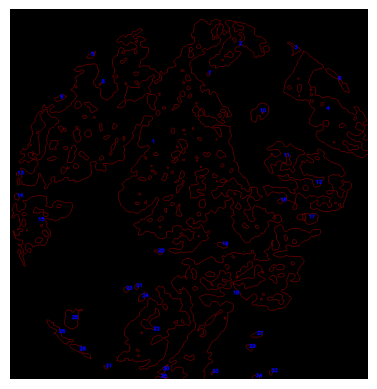

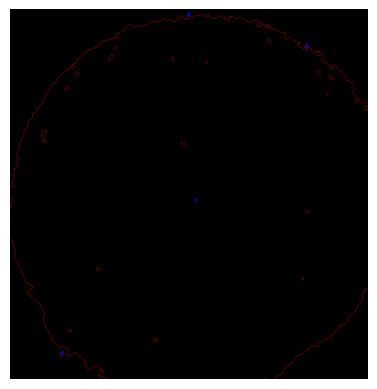

output/mask_data Folder already exists
Plotting outline masks for image R2_001
--------------------------------------------------
R2_002
output/outline_masks Folder already exists
Plotting outline masks for image R2_002


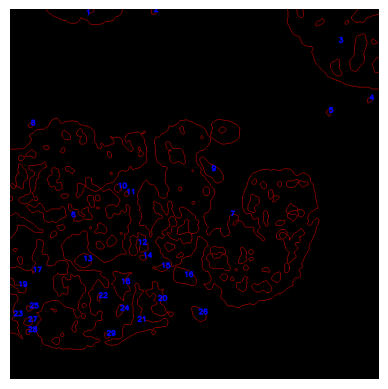

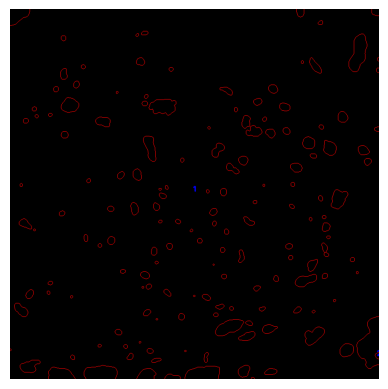

output/mask_data Folder already exists
Plotting outline masks for image R2_002
--------------------------------------------------
R2_003
output/outline_masks Folder already exists
Plotting outline masks for image R2_003


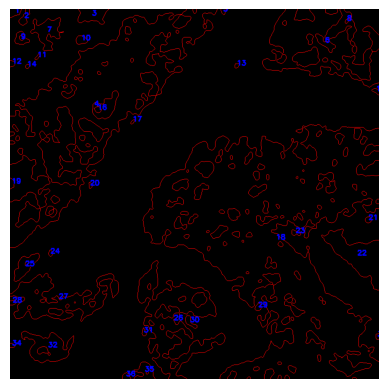

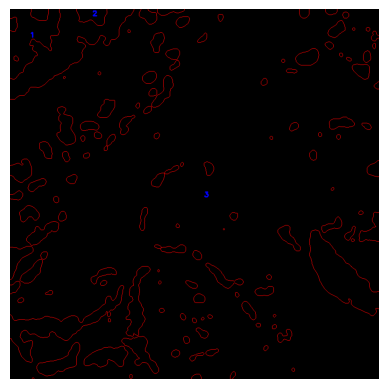

output/mask_data Folder already exists
Plotting outline masks for image R2_003
--------------------------------------------------


In [14]:
# create a list of info for each image: img_id, cell_mask_file, cancer_mask_file, tissue_mask_file
data_input_path = '/Users/pattama/Desktop/UiB/cancer/git_repo/IMCprocess/notebooks/mask_analysis/example_data/'
img_info = [['R2_001',data_input_path+'Patient2_001.tiff',data_input_path+'Patient2_001_cancer_mask.tiff',data_input_path+'Patient2_001_tissue_mask.tiff'],
            ['R2_002',data_input_path+'Patient2_002.tiff',data_input_path+'Patient2_002_cancer_mask.tiff',data_input_path+'Patient2_002_tissue_mask.tiff'],
            ['R2_003',data_input_path+'Patient2_003.tiff',data_input_path+'Patient2_003_cancer_mask.tiff',data_input_path+'Patient2_003_tissue_mask.tiff'],
            ]
input_anndata = data_lev1.adata_dict['level1']

for img_id, cell_mask_file, cancer_mask_file, tissue_mask_file in img_info:
    print(img_id)
    cells_data = full_pipeline_IMG_mask(labeled_anndata = input_anndata, 
                                        img_id=img_id, 
                                        cell_mask_file=cell_mask_file,
                                        cancer_mask_file=cancer_mask_file,
                                        tissue_mask_file=tissue_mask_file)
    print('--------------------------------------------------')